In [22]:
import os
import pandas as pd
import regex as re
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))

import matplotlib.pyplot as plt

def plot_resonance(data_df,topic):
    plt.figure(figsize=(25,7))
    data_df["Resonance"].plot(linewidth=1)
    # data_df["Novelty"].plot(linewidth=1,c='b')
    # data_df["Transience"].plot(linewidth=1,c='g')
    # plt.xlabel('id')
    # plt.ylabel('Novelty (green), Transience (blue)')
    plt.title(f'topic {topic}')
    plt.axvline(x=15, color='b', linestyle='--',lw=0.5)
    plt.axvline(x=23, color='r', linestyle='--',lw=0.5)
    plt.axvline(x=181, color='r', linestyle='--',lw=0.5)

    plt.show()


In [23]:
i=180
data_df = pd.read_csv(os.path.join(ROOT_DIR, "results_10", "All_Results.csv"), parse_dates=["Date"], index_col=["Date"])
data_df = data_df.sort_index()
data_df = data_df.loc["2022-01-01":"2022-12-31"]
data_df = data_df.query(f"Topic == {i}")
data_df["id"] = [index for index, row in enumerate(data_df.iterrows(), 1)]
data_df["Date"] = data_df.index
data_df = data_df.reset_index(drop=True)
data_df = data_df.set_index("id")
data_df.iloc[150:210,:]


,Source,URL,Title,Text,Novelty,Transience,Resonance,Topic,Date
id,,,,,,,,,
151,CBS,https://www.cbsnews.com/chicago/news/russia-in...,Explosions Heard In Ukraine As Russian Tanks A...,CHICAGO (CBS)-- An adviser to Ukraine's presid...,4.050623,4.861476,-0.810852,180,2022-02-24
152,CBS,https://www.cbsnews.com/miami/news/ukraine-say...,"Latest: Russia Invades Ukraine, Biden Announce...",Ukraine's Foreign Minister said early Thursday...,4.023525,4.128099,-0.104574,180,2022-02-24
153,CBS,https://www.cbsnews.com/news/russia-ukraine-10...,Russian assault on Ukraine included 100 missil...,Washington — The U.S. observed Russian forces ...,5.262199,5.079964,0.182235,180,2022-02-24
154,CBS,https://www.cbsnews.com/dfw/news/ukraine-russi...,"Ukraine Says Russian ""Full-Scale Invasion"" Und...","WASHINGTON, D.C. (CBSNEWS.COM) — Russia launch...",4.059705,3.728897,0.330809,180,2022-02-24
155,Guardian,https://www.theguardian.com/world/2022/feb/24/...,Russia has invaded Ukraine: what we know so far,Minutes after Vladimir Putin ended weeks of ag...,4.386723,5.659692,-1.272969,180,2022-02-24
156,Express,https://www.express.co.uk/news/world/1571036/U...,Ukraine attack: Multiple explosions resound ac...,"According to the reports, visuals of explosion...",5.120756,5.190035,-0.069279,180,2022-02-24
157,Express,https://www.express.co.uk/news/world/1571115/v...,'Recreate the Russian empire!' Cleverly reveal...,James Cleverly appeared on Sky News and reveal...,5.441495,5.491599,-0.050104,180,2022-02-24
158,Guardian,https://www.theguardian.com/world/2022/feb/24/...,Ukraine fighting to stop ‘a new iron curtain’ ...,"Ukraine’s president, Volodymyr Zelenskiy, has ...",5.685940,4.821943,0.863996,180,2022-02-24
159,Guardian,https://www.theguardian.com/world/2022/feb/23/...,Ukraine president vows to defend country as R...,Ukraine’s president has made a desperate appea...,4.545371,5.248035,-0.702664,180,2022-02-24


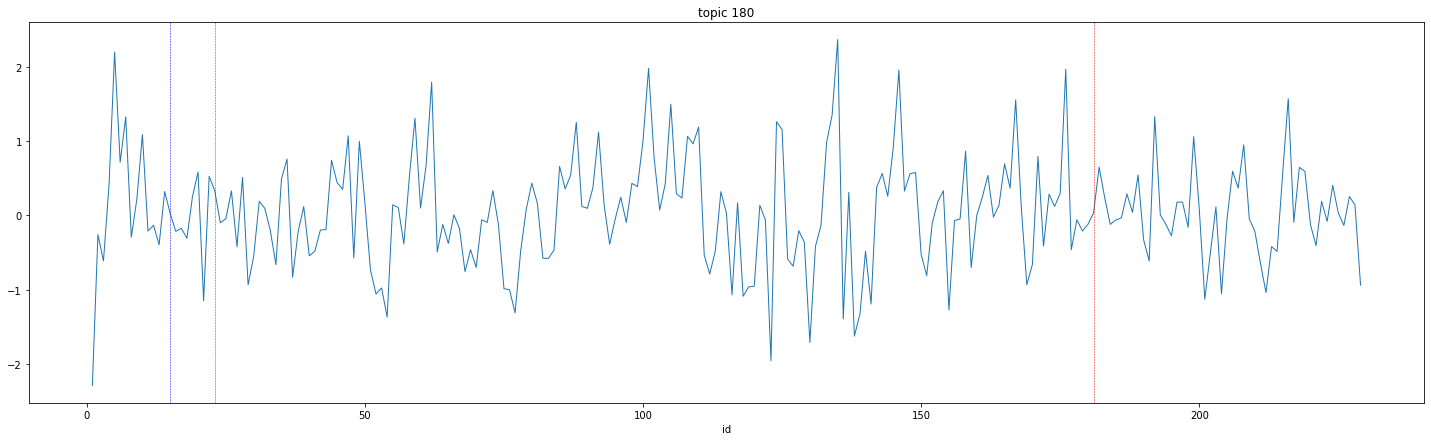

In [24]:
plot_resonance(data_df, i)

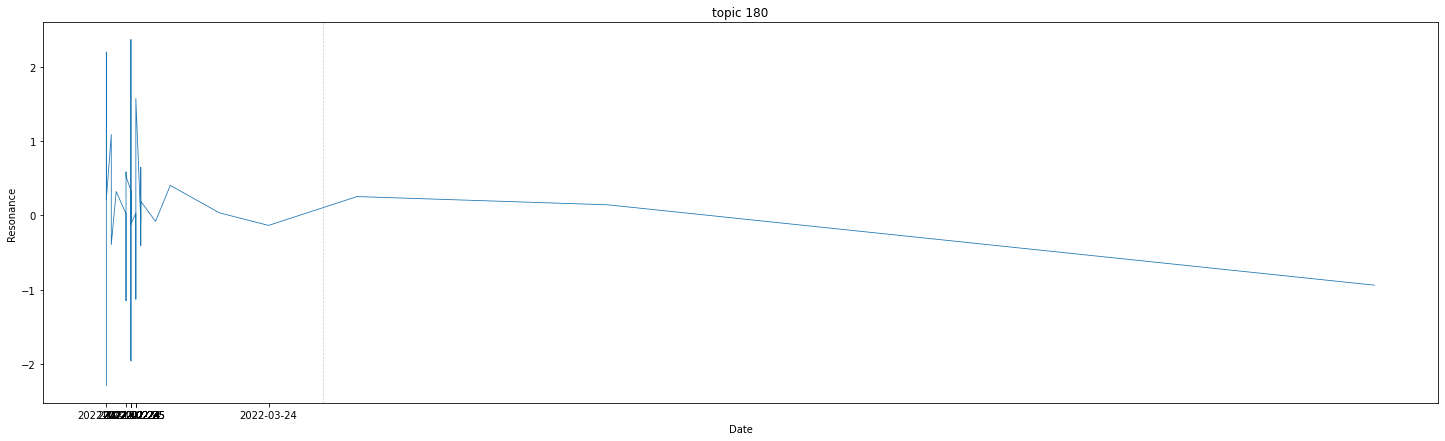

In [25]:
from matplotlib.dates import date2num
from datetime import datetime

def plot_resonance2(data_df, topic, figsize=(25, 7), linewidth=0.8):
    plt.figure(figsize=figsize)
    plt.plot(data_df["Date"], data_df["Resonance"], linewidth=linewidth)
    plt.xlabel('Date')
    plt.ylabel('Resonance')
    plt.title(f'topic {topic}')
    plt.xticks(data_df["Date"][::15])

    plt.axvline(x=date2num(datetime(2022, 4, 4)), color='k', linestyle='--',lw=0.7, alpha=0.2)
    plt.show()


data_df = pd.read_csv(os.path.join(ROOT_DIR, "results_10", "All_Results.csv"), parse_dates=["Date"], index_col=["Date"])
data_df = data_df.sort_index()
data_df = data_df.loc["2022-01-01":"2022-12-31"]
data_df = data_df.query(f"Topic == {i}")
data_df["id"] = [index for index, row in enumerate(data_df.iterrows(), 1)]
data_df["Date"] = data_df.index
data_df = data_df.reset_index(drop=True)
data_df = data_df.set_index("id")

plot_resonance2(data_df, topic=i)